<a href="https://colab.research.google.com/github/AnggaraPS/BiGRU_Prediksi_Saham_TLKM/blob/main/BILSTM_Prediksi_Saham_TLKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Concatenate
from keras.layers import LSTM, GRU, Bidirectional, Input
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# **Read Data**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data
dataset = pd.read_csv('/content/drive/MyDrive/Skripsi LSTM dan GRU/TLKM.csv', parse_dates = ['Date'])
dataset.set_index('Date', inplace=True)
print(dataset)

              Open    High     Low   Close    Adj Close       Volume
Date                                                                
2014-07-25  2650.0  2680.0  2630.0  2650.0  1964.389282   79928300.0
2014-08-04  2690.0  2700.0  2590.0  2690.0  1994.040527  212200700.0
2014-08-05  2710.0  2725.0  2685.0  2710.0  2008.865723   97982300.0
2014-08-06  2655.0  2710.0  2650.0  2655.0  1968.095459   83111900.0
2014-08-07  2690.0  2695.0  2655.0  2690.0  1994.040527   80249800.0
...            ...     ...     ...     ...          ...          ...
2024-07-18  3260.0  3280.0  3190.0  3210.0  3210.000000   98903500.0
2024-07-19  3200.0  3210.0  3120.0  3140.0  3140.000000  138117200.0
2024-07-22  3180.0  3210.0  3090.0  3100.0  3100.000000  139383000.0
2024-07-23  3140.0  3160.0  3100.0  3160.0  3160.000000   74338000.0
2024-07-24  3140.0  3150.0  3040.0  3060.0  3060.000000   98752100.0

[2472 rows x 6 columns]


# **Data Understanding**

In [ ]:
dataset.shape

(2472, 6)

In [ ]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2472 entries, 2014-07-25 to 2024-07-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2471 non-null   float64
 1   High       2471 non-null   float64
 2   Low        2471 non-null   float64
 3   Close      2471 non-null   float64
 4   Adj Close  2471 non-null   float64
 5   Volume     2471 non-null   float64
dtypes: float64(6)
memory usage: 135.2 KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2.471000e+03
mean,3681.052206,3719.291785,3642.397815,3680.295427,3008.689107,9.909391e+07
std,550.913509,552.528531,548.054054,551.756593,551.303725,6.622725e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,1937.268677,0.000000e+00
25%,3220.000000,3270.000000,3180.000000,3220.000000,2642.008545,6.136675e+07
50%,3790.000000,3820.000000,3750.000000,3780.000000,3011.145264,8.477690e+07
75%,4090.000000,4150.000000,4050.000000,4090.000000,3428.768066,1.181292e+08
max,4850.000000,4850.000000,4780.000000,4800.000000,4295.701172,1.155861e+09


# **Exploratory Data Analysis**

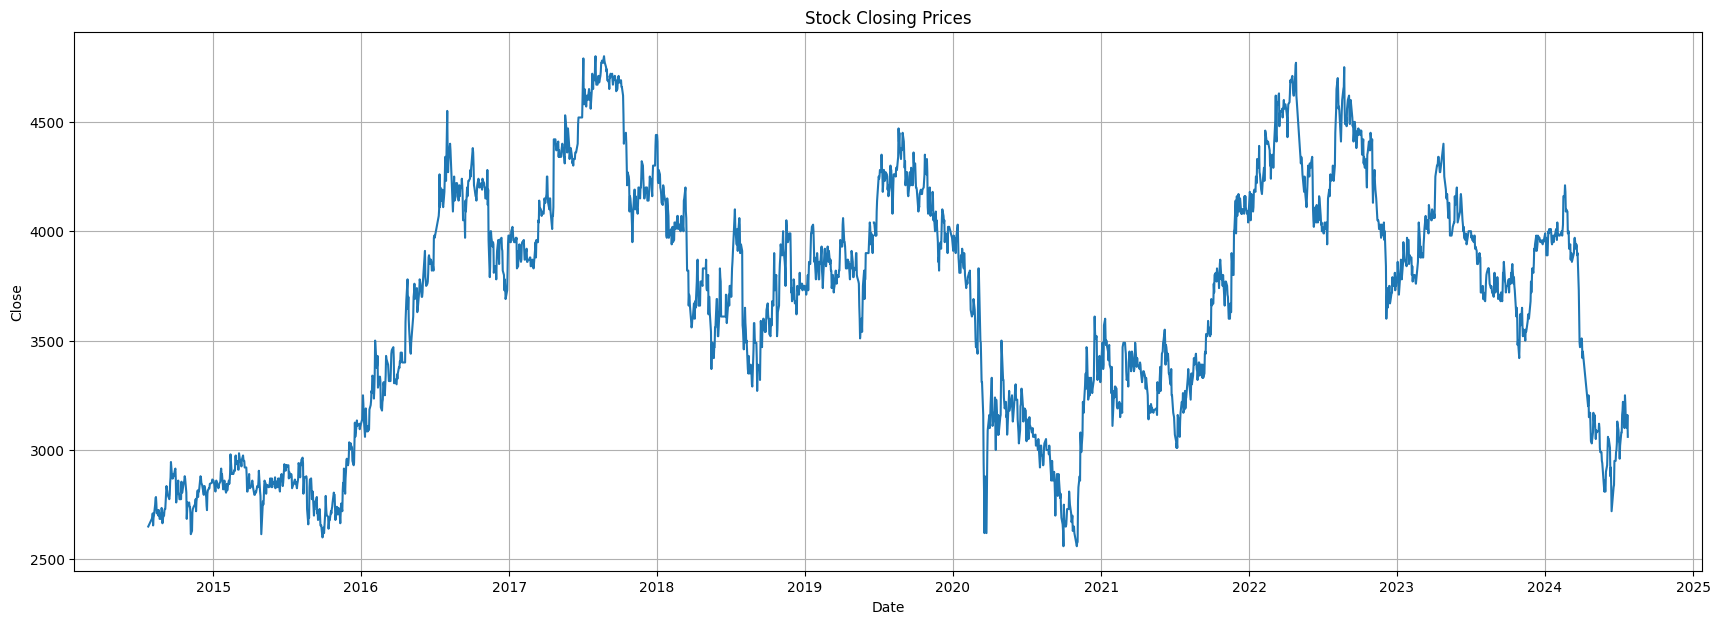

In [ ]:
plt.figure(figsize=(21, 7))
plt.plot(dataset['Close'])
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()

plt.figure(figsize=(21, 7))
plt.plot(dataset['Open'])
plt.title('Stock Opening Prices')
plt.xlabel('Date')
plt.ylabel('Open')
plt.grid(True)
plt.show()

plt.figure(figsize=(21, 7))
plt.plot(dataset['High'])
plt.title('Stock High Prices')
plt.xlabel('Date')
plt.ylabel('High')
plt.grid(True)
plt.show()

plt.figure(figsize=(21, 7))
plt.plot(dataset['Low'])
plt.title('Stock Low Prices')
plt.xlabel('Date')
plt.ylabel('Low')
plt.grid(True)
plt.show()

plt.figure(figsize=(21, 7))
plt.plot(dataset['Volume'])
plt.title('Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

plt.figure(figsize=(21, 7))
plt.plot(dataset['Adj Close'])
plt.title('Stock Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.grid(True)
plt.show()

# **Preprocessing Data**

## Data Cleaning

In [ ]:
dataset.isna().sum()

,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [ ]:
dataset[dataset.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-19,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


## Data Correlation

In [ ]:
dataset.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997242,0.997574,0.994914,0.884199,-0.055743
High,0.997242,1.000000,0.996599,0.997769,0.886575,-0.032297
Low,0.997574,0.996599,1.000000,0.997538,0.884199,-0.077229
Close,0.994914,0.997769,0.997538,1.000000,0.887247,-0.055129
Adj Close,0.884199,0.886575,0.884199,0.887247,1.000000,0.034657
Volume,-0.055743,-0.032297,-0.077229,-0.055129,0.034657,1.000000


## Data Reduction

In [ ]:
data = dataset.drop(columns=['Volume'])

# **Baseline Model**

## Train and Test Sets

In [ ]:
split_size = int(len(data) * 0.8)
train_data = data[:split_size]
test_data = data[split_size:]

## Data Normalization

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)
print('Train_scaled\n', train_scaled)
print('\nTest_scaled\n', test_scaled)

Train_scaled
 [[0.04347826 0.03982301 0.07725322 0.04017857 0.01219285]
 [0.06086957 0.04867257 0.06008584 0.05803571 0.02552343]
 [0.06956522 0.05973451 0.10085837 0.06696429 0.03218852]
 ...
 [0.67826087 0.67256637 0.66523605 0.64285714 0.7553664 ]
 [0.63478261 0.64159292 0.66523605 0.65178571 0.763498  ]
 [0.63913043 0.64159292 0.59656652 0.63839286 0.75130054]]

Test_scaled
 [[0.63478261 0.65486726 0.64377682 0.63839286 0.75130054]
 [0.65217391 0.6460177  0.65236052 0.65178571 0.763498  ]
 [0.64782609 0.6460177  0.6695279  0.66071429 0.77162961]
 ...
 [0.27391304 0.27433628 0.27467811 0.24107143 0.52273949]
 [0.25652174 0.25221239 0.27896996 0.26785714 0.54971422]
 [0.25652174 0.24778761 0.25321888 0.22321429 0.50475633]]


In [ ]:
train_scaled.shape, test_scaled.shape

((1976, 5), (495, 5))

## Sliding Window

In [ ]:
window_size = 14
features = 5

In [ ]:
def sliding_window (dataTLKM, timesteps):
    X = []
    Y = []

    for i in range(len(dataTLKM) - window_size + 1):
        dataX = dataTLKM[i:i + window_size, :]
        dataY = dataTLKM[i + window_size - 1, :]
        X.append(dataX)
        Y.append(dataY)

    X = np.array(X)
    Y = np.array(Y)
    return X, Y

In [ ]:
train_X, train_Y = sliding_window(train_scaled, window_size)
test_X, test_Y = sliding_window(test_scaled, window_size)


In [ ]:
test_X

array([[[0.49565217, 0.53097345, 0.53744493, 0.55656109, 0.609813  ],
        [0.54347826, 0.53982301, 0.56828194, 0.53846154, 0.59355521],
        [0.50434783, 0.52654867, 0.55066079, 0.5520362 , 0.6057485 ],
        ...,
        [0.54347826, 0.54424779, 0.55947137, 0.54751131, 0.60168411],
        [0.52173913, 0.52212389, 0.55506608, 0.52036199, 0.57729731],
        [0.51304348, 0.53097345, 0.56387665, 0.55656109, 0.609813  ]],

       [[0.54347826, 0.53982301, 0.56828194, 0.53846154, 0.59355521],
        [0.50434783, 0.52654867, 0.55066079, 0.5520362 , 0.6057485 ],
        [0.53478261, 0.53539823, 0.56387665, 0.53846154, 0.59355521],
        ...,
        [0.52173913, 0.52212389, 0.55506608, 0.52036199, 0.57729731],
        [0.51304348, 0.53097345, 0.56387665, 0.55656109, 0.609813  ],
        [0.54782609, 0.55752212, 0.57268722, 0.57466063, 0.6260708 ]],

       [[0.50434783, 0.52654867, 0.55066079, 0.5520362 , 0.6057485 ],
        [0.53478261, 0.53539823, 0.56387665, 0.53846154, 0.5

In [ ]:
print('train_X',train_X.shape)
print('train_Y',train_Y.shape)

train_X (971, 14, 5)
train_Y (971, 5)


In [ ]:
print('train_X\n',train_X[0])
print('train_Y\n',train_Y[0])

train_X
 [[0.52173913 0.51327434 0.57268722 0.53846154 0.38327768]
 [0.52173913 0.51769912 0.55066079 0.52941176 0.37627038]
 [0.50434783 0.52212389 0.54625551 0.53393665 0.37977409]
 [0.49565217 0.50884956 0.54625551 0.52036199 0.36926298]
 [0.52608696 0.53097345 0.57268722 0.54751131 0.39028509]
 [0.53043478 0.53539823 0.57268722 0.56108597 0.40079631]
 [0.55217391 0.54867257 0.56387665 0.52941176 0.37627038]
 [0.52608696 0.53539823 0.56828194 0.56108597 0.40079631]
 [0.55217391 0.5619469  0.59471366 0.58823529 0.42181864]
 [0.54782609 0.55752212 0.59030837 0.58371041 0.41831483]
 [0.56956522 0.59292035 0.61674009 0.6199095  0.44634457]
 [0.60434783 0.62389381 0.64757709 0.64705882 0.4673669 ]
 [0.6173913  0.61946903 0.66519824 0.64705882 0.4673669 ]
 [0.63478261 0.63274336 0.66960352 0.66063348 0.47787801]]
train_Y
 [0.63478261 0.63274336 0.66960352 0.66063348 0.47787801]


In [ ]:
print('test_X',test_X.shape)
print('test_Y',test_Y.shape)

test_X (234, 14, 5)
test_Y (234, 5)


In [ ]:
print('test_X\n',test_X[0])
print('test_Y\n',test_Y[0])

test_X
 [[0.49565217 0.53097345 0.53744493 0.55656109 0.609813  ]
 [0.54347826 0.53982301 0.56828194 0.53846154 0.59355521]
 [0.50434783 0.52654867 0.55066079 0.5520362  0.6057485 ]
 [0.53478261 0.53539823 0.56387665 0.53846154 0.59355521]
 [0.53043478 0.55309735 0.57268722 0.56561086 0.6179419 ]
 [0.54347826 0.53982301 0.55506608 0.52941176 0.58542632]
 [0.50869565 0.53097345 0.55506608 0.5520362  0.6057485 ]
 [0.52608696 0.53539823 0.57268722 0.53846154 0.59355521]
 [0.52173913 0.53539823 0.57268722 0.56108597 0.6138774 ]
 [0.53913043 0.57522124 0.5814978  0.58823529 0.63826419]
 [0.56086957 0.5619469  0.59911894 0.57013575 0.62200629]
 [0.54347826 0.54424779 0.55947137 0.54751131 0.60168411]
 [0.52173913 0.52212389 0.55506608 0.52036199 0.57729731]
 [0.51304348 0.53097345 0.56387665 0.55656109 0.609813  ]]
test_Y
 [0.51304348 0.53097345 0.56387665 0.55656109 0.609813  ]


In [ ]:
train_X.shape[1],train_X.shape[2]

(14, 5)

In [ ]:
train_Y.shape[1]

5

# GRID SEARCH

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.001, dropout_rate=0.2, batch_size=32, epochs=50):
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def fit(self, X, y):
        self.model = self._create_model()
        self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=1)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        loss = self.model.evaluate(X, y, verbose=0)
        return -loss  # Karena GridSearchCV memaksimalkan skor

    def _create_model(self):
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
        from tensorflow.keras.optimizers import Adam

        model = Sequential()
        model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True),
                               input_shape=(train_X.shape[1], train_X.shape[2])))
        model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
        model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(train_Y.shape[1]))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(loss='mse', optimizer=optimizer)
        return model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Buat model dengan custom wrapper
model = KerasRegressorWrapper()

# Definisikan parameter grid
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [50, 100],
    'learning_rate': [0.001],  # Tetap
    'dropout_rate': [0.2]  # Tetap
}

# Jalankan Grid Search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Gunakan negatif MSE untuk regresi
    cv=3,  # 3-fold cross-validation
    verbose=1
)

# Jalankan Grid Search
grid_result = grid.fit(train_X, train_Y)

# Evaluasi hasil
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Score (Negative MSE): {grid_result.best_score_}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.1370
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0125
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0090
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0082
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0071
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0060
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0053
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0048
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0047
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0043
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0040
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0032
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0028
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0037
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0032
Epoc

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.1094
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0090
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0070
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0064
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0057
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0043
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0041
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0036
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0035
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0034
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0028
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0027
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0026
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0024
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0030
Epoch 16/50
41/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1108
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0086
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0056
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0053
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0051
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0050
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0051
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0045
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0039
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0039
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0032
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0038
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0032
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0038
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0032
Epoch 16/50
41/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1645
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0115
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0088
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0080
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0076
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0062
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0061
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0049
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0041
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0049
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0038
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0041
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0033
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0031
Epoch 15/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0038
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.1014
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0087
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0069
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0059
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0046
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0039
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0033
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0041
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0034
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0030
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0030
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0023
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0027
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0022
Epoch 15/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0021
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1156
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0083
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0060
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0058
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0049
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0050
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0041
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0040
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0037
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0036
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0035
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0037
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0031
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0029
Epoch 15/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0027
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.1897
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0155
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0108
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0090
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0082
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0079
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0076
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0069
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0070
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0060
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0055
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0051
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0047
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0047
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0049
Epoch 16/50
21/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.1120
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0117
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0079
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0067
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0055
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0053
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0047
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0042
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0040
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0037
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0034
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0032
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0035
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0029
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0026
Epoch 16/50
21/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.1990
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0190
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0086
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0065
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0063
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0059
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0055
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0050
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0050
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0048
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0042
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0048
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0046
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0045
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0042
Epoch 16/50
21/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.2094
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0172
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0106
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0103
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0093
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0079
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0077
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0070
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0066
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0060
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0061
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0055
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0050
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0046
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0049
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.1213
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0120
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0079
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0064
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0056
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0056
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0047
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0050
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0040
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0042
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0036
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0039
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0034
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0028
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0031
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.1652
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0159
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0092
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0067
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0066
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0055
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0059
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0049
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0056
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0047
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0042
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0042
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0042
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0043
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0039
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.2607
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0381
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0158
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0118
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0114
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0097
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0095
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0090
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0086
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 0.0083
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0080
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0074
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0077
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0072
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0066
Epoch 16/50
1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.1692
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0254
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0127
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0088
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0076
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0067
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0065
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0059
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - loss: 0.0056
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 0.0057
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0049
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0045
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0042
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0045
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0042
Epoch 16/50
1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.2326
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0327
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0153
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.0115
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0088
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0083
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0081
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0070
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0068
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0063
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0060
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0060
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0058
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0054
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0051 
Epoch 16/50

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 0.2226
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0219
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0142
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0119
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.0103
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0096
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0088
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0079
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0084
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0077
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0074
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0070
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0064
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0061
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.0053

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 0.1676
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0253
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0169
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0117
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0095
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0090
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0081
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0081
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0070
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0073
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0066
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0060
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0060
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0053
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0051

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - loss: 0.1874
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0177
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0108
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0089
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0068
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0066
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0057
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0058
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0060
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0050
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0055
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 0.0048
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0049
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0043
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.004

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0973
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0085
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0068
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0058
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0046
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0048
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0037
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0030
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0033
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0028
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0025
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0024
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0025
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0020
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0020


In [ ]:
from tensorflow.keras.models import save_model

# Simpan model terbaik ke file .h5
BiLSTM_Save = '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiLSTM.h5'
grid_result.best_estimator_.model.save(BiLSTM_Save)
print(f"Model disimpan di: {BiLSTM_Save}")

In [ ]:
from tensorflow.keras.models import load_model

# Muat model dari file .h5
loaded_model = load_model(BiLSTM_Save)
print("Model berhasil dimuat.")

In [ ]:
model_BiLSTM = Sequential()
model_BiLSTM.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True),
                               input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiLSTM.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
model_BiLSTM.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
model_BiLSTM.add(Dropout(0.2))
model_BiLSTM.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiLSTM.compile(loss='mse', optimizer=optimizer)

history_BiLSTM = model_BiLSTM.fit(train_X, train_Y, epochs=50, batch_size=32, verbose=1, validation_data=(test_X, test_Y))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - loss: 0.1004 - val_loss: 0.0108
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0087 - val_loss: 0.0123
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0067 - val_loss: 0.0055
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0025 - val_

In [ ]:
model_BiLSTM2 = Sequential()
model_BiLSTM2.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True),
                               input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiLSTM2.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
model_BiLSTM2.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
model_BiLSTM2.add(Dropout(0.2))
model_BiLSTM2.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiLSTM2.compile(loss='mse', optimizer=optimizer)

history_BiLSTM2 = model_BiLSTM2.fit(train_X, train_Y, epochs=100, batch_size=32, verbose=1, validation_data=(test_X, test_Y))

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.1065 - val_loss: 0.0115
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0088 - val_loss: 0.0123
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0068 - val_loss: 0.0098
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/ste

In [ ]:
model_BiLSTM3 = Sequential()
model_BiLSTM3.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True),
                               input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiLSTM3.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
model_BiLSTM3.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
model_BiLSTM3.add(Dropout(0.2))
model_BiLSTM3.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiLSTM3.compile(loss='mse', optimizer=optimizer)

history_BiLSTM3 = model_BiLSTM3.fit(train_X, train_Y, epochs=50, batch_size=64, verbose=1, validation_data=(test_X, test_Y))

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - loss: 0.1721 - val_loss: 0.0083
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 0.0121 - val_loss: 0.0115
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0080 - val_loss: 0.0104
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0068 - val_loss: 0.0111
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - loss: 0.0059 - val_loss: 0.0084
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0048 - val_loss: 0.0021
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - los

In [ ]:
model_BiLSTM4 = Sequential()
model_BiLSTM4.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True),
                               input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiLSTM4.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
model_BiLSTM4.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
model_BiLSTM4.add(Dropout(0.2))
model_BiLSTM4.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiLSTM4.compile(loss='mse', optimizer=optimizer)

history_BiLSTM4 = model_BiLSTM4.fit(train_X, train_Y, epochs=100, batch_size=64, verbose=1, validation_data=(test_X, test_Y))

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 121ms/step - loss: 0.1504 - val_loss: 0.0160
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0104 - val_loss: 0.0121
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0074 - val_loss: 0.0100
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0065 - val_loss: 0.0103
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0056 - val_loss: 0.0070
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 0.0052 - val_loss: 0.0027
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 168m

In [ ]:
model_BiLSTM5 = Sequential()
model_BiLSTM5.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True),
                               input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiLSTM5.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
model_BiLSTM5.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
model_BiLSTM5.add(Dropout(0.2))
model_BiLSTM5.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiLSTM5.compile(loss='mse', optimizer=optimizer)

history_BiLSTM5 = model_BiLSTM5.fit(train_X, train_Y, epochs=50, batch_size=128, verbose=1, validation_data=(test_X, test_Y))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 211ms/step - loss: 0.2320 - val_loss: 0.0206
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.0185 - val_loss: 0.0182
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - loss: 0.0130 - val_loss: 0.0120
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 0.0090 - val_loss: 0.0124
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0084 - val_loss: 0.0111
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.0078 - val_loss: 0.0096
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.0071 - val_loss: 0.0098
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - loss: 0.0069 - val_loss: 0.0089
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/ste

In [ ]:
model_BiLSTM6 = Sequential()
model_BiLSTM6.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True),
                               input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiLSTM6.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
model_BiLSTM6.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
model_BiLSTM6.add(Dropout(0.2))
model_BiLSTM6.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiLSTM6.compile(loss='mse', optimizer=optimizer)

history_BiLSTM6 = model_BiLSTM6.fit(train_X, train_Y, epochs=100, batch_size=128, verbose=1, validation_data=(test_X, test_Y))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 275ms/step - loss: 0.2014 - val_loss: 0.0215
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - loss: 0.0222 - val_loss: 0.0140
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 0.0120 - val_loss: 0.0121
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.0096 - val_loss: 0.0115
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 0.0081 - val_loss: 0.0092
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.0074 - val_loss: 0.0092
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - loss: 0.0065 - val_loss: 0.0103
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0062 - val_loss: 0.0071
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0059 - val_loss: 0.0033
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0048 - val_loss: 0.0026
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0046 - val_loss: 0.0030
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
plt.plot(history_BiLSTM.history['loss'])
plt.plot(history_BiLSTM.history['val_loss'])
plt.title('Model Loss BiLSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

plt.plot(history_BiLSTM2.history['loss'])
plt.plot(history_BiLSTM2.history['val_loss'])
plt.title('Model Loss BiLSTM2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

plt.plot(history_BiLSTM3.history['loss'])
plt.plot(history_BiLSTM3.history['val_loss'])
plt.title('Model Loss BiLSTM3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

plt.plot(history_BiLSTM4.history['loss'])
plt.plot(history_BiLSTM4.history['val_loss'])
plt.title('Model Loss BiLSTM4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

plt.plot(history_BiLSTM5.history['loss'])
plt.plot(history_BiLSTM5.history['val_loss'])
plt.title('Model Loss BiLSTM5')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

plt.plot(history_BiLSTM6.history['loss'])
plt.plot(history_BiLSTM6.history['val_loss'])
plt.title('Model Loss BiLSTM6')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

In [ ]:
pred_BiLSTM = model_BiLSTM.predict(test_X)
pred_BiLSTM[-1,0]
pred_BiLSTM2 = model_BiLSTM2.predict(test_X)
pred_BiLSTM2[-1,0]
pred_BiLSTM3 = model_BiLSTM3.predict(test_X)
pred_BiLSTM3[-1,0]
pred_BiLSTM4 = model_BiLSTM4.predict(test_X)
pred_BiLSTM4[-1,0]
pred_BiLSTM5 = model_BiLSTM5.predict(test_X)
pred_BiLSTM5[-1,0]
pred_BiLSTM6 = model_BiLSTM6.predict(test_X)
pred_BiLSTM6[-1,0]

mape = mean_absolute_percentage_error(test_Y, pred_BiLSTM)
rmse = root_mean_squared_error(test_Y, pred_BiLSTM)
r= r2_score(test_Y, pred_BiLSTM)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared Score:', r)

mape2 = mean_absolute_percentage_error(test_Y, pred_BiLSTM2)
rmse2 = root_mean_squared_error(test_Y, pred_BiLSTM2)
r2 = r2_score(test_Y, pred_BiLSTM2)
print('\nMean Absolute Percentage Error (MAPE):', mape2)
print('Root Mean Squared Error (RMSE):', rmse2)
print('R-squared Score:', r2)

mape3 = mean_absolute_percentage_error(test_Y, pred_BiLSTM3)
rmse3 = root_mean_squared_error(test_Y, pred_BiLSTM3)
r3 = r2_score(test_Y, pred_BiLSTM3)
print('\nMean Absolute Percentage Error (MAPE):', mape3)
print('Root Mean Squared Error (RMSE):', rmse3)
print('R-squared Score:', r3)

mape4 = mean_absolute_percentage_error(test_Y, pred_BiLSTM4)
rmse4 = root_mean_squared_error(test_Y, pred_BiLSTM4)
r4 = r2_score(test_Y, pred_BiLSTM4)
print('\nMean Absolute Percentage Error (MAPE):', mape4)
print('Root Mean Squared Error (RMSE):', rmse4)
print('R-squared Score:', r4)

mape5 = mean_absolute_percentage_error(test_Y, pred_BiLSTM5)
rmse5 = root_mean_squared_error(test_Y, pred_BiLSTM5)
r5 = r2_score(test_Y, pred_BiLSTM5)
print('\nMean Absolute Percentage Error (MAPE):', mape5)
print('Root Mean Squared Error (RMSE):', rmse5)
print('R-squared Score:', r5)

mape6 = mean_absolute_percentage_error(test_Y, pred_BiLSTM6)
rmse6 = root_mean_squared_error(test_Y, pred_BiLSTM6)
r6 = r2_score(test_Y, pred_BiLSTM6)
print('\nMean Absolute Percentage Error (MAPE):', mape6)
print('Root Mean Squared Error (RMSE):', rmse6)
print('R-squared Score:', r6)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step
Mean Absolute Percentage Error (MAPE): 0.041489831303151245
Root Mean Squared Error (RMSE): 0.023014975184332903
R-squared Score: 0.9825150221075074

Mean Absolute Percentage Error (MAPE): 0.029675864992248568
Root Mean Squared Error (RMSE): 0.016096170853087757
R-squared Score: 0.9909665198567594

Mean Absolute Percentage Error (MAPE): 0.026168005947165514
Root Mean Squared Error (RMSE): 0.017418996759307033
R-squared Score: 0.9871664806822149

Mean Absolute Percentage Error (MAPE): 0.028756514538943734
Root Mean Squared Error (RMSE): 0.01785719852760058
R-squared Score: 0.9838160544512137

Mean Absolute Percentage Error (MAPE): 0.07294118039256635
Root Mean Squared Error (RMSE): 0.03597790172159508
R-squared Score: 0.9566516843969032

Mean Absolut

# **Evaluation Model**

## Prediction


In [ ]:
BiLSTM_Save= '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiLSTM.h5'
# model_BiLSTM.save(BiLSTM_Save)

BiLSTM_Save2= '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiLSTM2.h5'
# model_BiLSTM2.save(BiLSTM_Save2)

BiLSTM_Save3= '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiLSTM3.h5'
# model_BiLSTM3.save(BiLSTM_Save3)

BiLSTM_Save4= '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiLSTM4.h5'
# model_BiLSTM4.save(BiLSTM_Save4)

BiLSTM_Save5= '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiLSTM5.h5'
# model_BiLSTM5.save(BiLSTM_Save5)

BiLSTM_Save6= '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiLSTM6.h5'
# model_BiLSTM6.save(BiLSTM_Save6)

In [ ]:
loaded_model_BiLSTM = tf.keras.models.load_model(BiLSTM_Save, custom_objects={'mse': keras.losses.MeanSquaredError})
loaded_model_BiLSTM2 = tf.keras.models.load_model(BiLSTM_Save2, custom_objects={'mse': keras.losses.MeanSquaredError})
loaded_model_BiLSTM3 = tf.keras.models.load_model(BiLSTM_Save3, custom_objects={'mse': keras.losses.MeanSquaredError})
loaded_model_BiLSTM4 = tf.keras.models.load_model(BiLSTM_Save4, custom_objects={'mse': keras.losses.MeanSquaredError})
loaded_model_BiLSTM5 = tf.keras.models.load_model(BiLSTM_Save5, custom_objects={'mse': keras.losses.MeanSquaredError})
loaded_model_BiLSTM6 = tf.keras.models.load_model(BiLSTM_Save6, custom_objects={'mse': keras.losses.MeanSquaredError})

In [ ]:
pred_BiLSTM = loaded_model_BiLSTM.predict(test_X)
pred_BiLSTM[-1,0]
pred_BiLSTM2 = loaded_model_BiLSTM2.predict(test_X)
pred_BiLSTM2[-1,0]
pred_BiLSTM3 = loaded_model_BiLSTM3.predict(test_X)
pred_BiLSTM3[-1,0]
pred_BiLSTM4 = loaded_model_BiLSTM4.predict(test_X)
pred_BiLSTM4[-1,0]
pred_BiLSTM5 = loaded_model_BiLSTM5.predict(test_X)
pred_BiLSTM5[-1,0]
pred_BiLSTM6 = loaded_model_BiLSTM6.predict(test_X)
pred_BiLSTM6[-1,0]


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step


0.27887523

In [ ]:
print("prediction\n", pred_BiLSTM)
print("\nPrediction Shape-",pred_BiLSTM.shape)

prediction
 [[0.7106393  0.71110916 0.73839885 0.7374435  0.79762477]
 [0.7181081  0.71843755 0.7453682  0.7446451  0.8052898 ]
 [0.72231823 0.7225903  0.7491886  0.74825084 0.809669  ]
 ...
 [0.32256836 0.3160357  0.35751855 0.34045303 0.43588427]
 [0.31958354 0.3133796  0.35499793 0.33751464 0.43352777]
 [0.3096316  0.3044107  0.3461796  0.32777655 0.42459962]]

Prediction Shape- (482, 5)


In [ ]:
# Calculate
mape = mean_absolute_percentage_error(test_Y, pred_BiLSTM)
rmse = root_mean_squared_error(test_Y, pred_BiLSTM)
r= r2_score(test_Y, pred_BiLSTM)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared Score:', r)

mape2 = mean_absolute_percentage_error(test_Y, pred_BiLSTM2)
rmse2 = root_mean_squared_error(test_Y, pred_BiLSTM2)
r2= r2_score(test_Y, pred_BiLSTM2)
print('\nMean Absolute Percentage Error (MAPE):', mape2)
print('Root Mean Squared Error (RMSE):', rmse2)
print('R-squared Score:', r2)

mape3 = mean_absolute_percentage_error(test_Y, pred_BiLSTM3)
rmse3 = root_mean_squared_error(test_Y, pred_BiLSTM3)
r3= r2_score(test_Y, pred_BiLSTM3)
print('\nMean Absolute Percentage Error (MAPE):', mape3)
print('Root Mean Squared Error (RMSE):', rmse3)
print('R-squared Score:', r3)

mape4 = mean_absolute_percentage_error(test_Y, pred_BiLSTM4)
rmse4 = root_mean_squared_error(test_Y, pred_BiLSTM4)
r4= r2_score(test_Y, pred_BiLSTM4)
print('\nMean Absolute Percentage Error (MAPE):', mape4)
print('Root Mean Squared Error (RMSE):', rmse4)
print('R-squared Score:', r4)

mape5 = mean_absolute_percentage_error(test_Y, pred_BiLSTM5)
rmse5 = root_mean_squared_error(test_Y, pred_BiLSTM5)
r5= r2_score(test_Y, pred_BiLSTM5)
print('\nMean Absolute Percentage Error (MAPE):', mape5)
print('Root Mean Squared Error (RMSE):', rmse5)
print('R-squared Score:', r5)

mape6 = mean_absolute_percentage_error(test_Y, pred_BiLSTM6)
rmse6 = root_mean_squared_error(test_Y, pred_BiLSTM6)
r6= r2_score(test_Y, pred_BiLSTM6)
print('\nMean Absolute Percentage Error (MAPE):', mape6)
print('Root Mean Squared Error (RMSE):', rmse6)
print('R-squared Score:', r6)

Mean Absolute Percentage Error (MAPE): 0.030812356316214994
Root Mean Squared Error (RMSE): 0.019476335224254366
R-squared Score: 0.9846891748716772

Mean Absolute Percentage Error (MAPE): 0.03374584824054004
Root Mean Squared Error (RMSE): 0.019967579440470996
R-squared Score: 0.9850492629869269

Mean Absolute Percentage Error (MAPE): 0.0462811553267859
Root Mean Squared Error (RMSE): 0.026622992579375598
R-squared Score: 0.9721494977003375

Mean Absolute Percentage Error (MAPE): 0.04215100590727
Root Mean Squared Error (RMSE): 0.021387835907218582
R-squared Score: 0.9847156486997877

Mean Absolute Percentage Error (MAPE): 0.0890865426529366
Root Mean Squared Error (RMSE): 0.042625504015353685
R-squared Score: 0.9381384272496784

Mean Absolute Percentage Error (MAPE): 0.03594554251077402
Root Mean Squared Error (RMSE): 0.019170811810392395
R-squared Score: 0.9865643945045541


## Un-Normalize Data

In [ ]:
actual_unscaled = scaler.inverse_transform(test_Y)

In [ ]:
y_test = scaler.inverse_transform(test_Y)
y_train = scaler.inverse_transform(train_Y)

In [ ]:
def prediction(model):
    prediction = model.predict(test_X)
    prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_bilstm = prediction(model_BiLSTM)
prediction_bilstm


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[3785.0593, 3810.6165, 3739.3025, 3789.6506, 3425.3215],
       [3793.9285, 3819.043 , 3747.813 , 3799.2712, 3434.9414],
       [3815.4756, 3839.1367, 3768.4644, 3821.6377, 3457.7449],
       ...,
       [3980.6523, 3997.2693, 3933.9893, 3986.2607, 3726.8894],
       [3980.706 , 3997.6277, 3933.993 , 3986.1309, 3725.0815],
       [3979.1304, 3996.3716, 3932.6511, 3984.4558, 3723.1924]],
      dtype=float32)

In [ ]:
pred_unscaled_BiLSTM = scaler.inverse_transform(pred_BiLSTM)

In [ ]:
print("Actual_unscaled Values--\n " ,actual_unscaled)
print("\nPred_unscaled_LSTM Values--\n " ,pred_unscaled_BiLSTM)

Actual_unscaled Values--
  [[3730.       3790.       3730.       3790.       3427.517578]
 [3810.       3850.       3750.       3830.       3463.691895]
 [3820.       3900.       3790.       3870.       3499.866211]
 ...
 [3990.       4000.       3920.       3940.       3713.126953]
 [3960.       3970.       3940.       3960.       3731.975098]
 [3960.       3980.       3940.       3950.       3722.551025]]

Pred_unscaled_LSTM Values--
  [[3785.0593 3810.6165 3739.3025 3789.6506 3425.3215]
 [3793.9285 3819.043  3747.813  3799.2712 3434.9414]
 [3815.4756 3839.1367 3768.4644 3821.6377 3457.7449]
 ...
 [3980.6523 3997.2693 3933.9893 3986.2607 3726.8894]
 [3980.706  3997.6277 3933.993  3986.1309 3725.0815]
 [3979.1304 3996.3716 3932.6511 3984.4558 3723.1924]]


In [ ]:
data_test = test_data[6:]
data_test.shape

(241, 5)

In [ ]:
names = ['Open', 'High', 'Low', 'Close', 'Adj Close']
test_df = pd.DataFrame(actual_unscaled, columns=names)
test_df

,Open,High,Low,Close,Adj Close
0,3730.0,3790.0,3730.0,3790.0,3427.517578
1,3810.0,3850.0,3750.0,3830.0,3463.691895
2,3820.0,3900.0,3790.0,3870.0,3499.866211
3,3790.0,3900.0,3780.0,3860.0,3490.822754
4,3820.0,3860.0,3770.0,3780.0,3418.473877
...,...,...,...,...,...
229,3960.0,3970.0,3930.0,3950.0,3722.551025
230,3980.0,3980.0,3950.0,3960.0,3731.975098
231,3990.0,4000.0,3920.0,3940.0,3713.126953
232,3960.0,3970.0,3940.0,3960.0,3731.975098


In [ ]:
names = ['Open', 'High', 'Low', 'Close', 'Adj Close']
preds_BiLSTM_df = pd.DataFrame(pred_unscaled_BiLSTM, columns=names)
preds_BiLSTM_df

,Open,High,Low,Close,Adj Close
0,3785.059326,3810.616455,3739.302490,3789.650635,3425.321533
1,3793.928467,3819.042969,3747.812988,3799.271240,3434.941406
2,3815.475586,3839.136719,3768.464355,3821.637695,3457.744873
3,3831.634033,3854.567383,3784.106201,3838.019043,3474.617432
4,3829.655273,3853.169678,3782.626709,3835.359131,3470.455811
...,...,...,...,...,...
229,3980.893799,3995.574707,3932.624512,3985.815186,3724.391357
230,3982.896729,3998.423828,3935.458740,3988.261719,3729.025391
231,3980.652344,3997.269287,3933.989258,3986.260742,3726.889404
232,3980.706055,3997.627686,3933.992920,3986.130859,3725.081543


## Calculate Data

## Plot Data

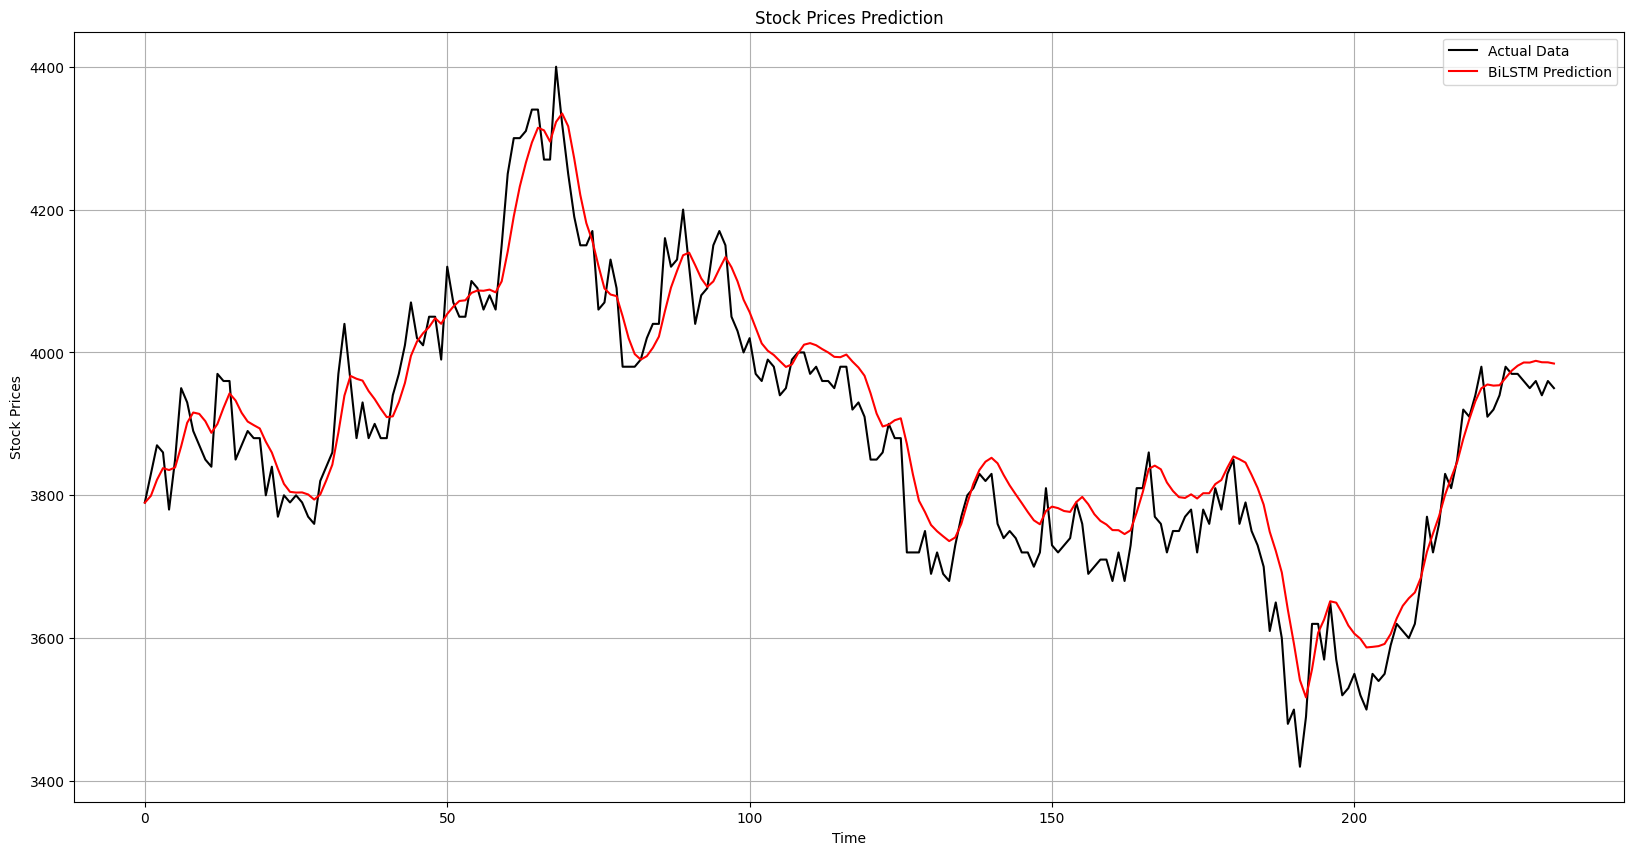

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_df.index, test_df['Close'], 'black', label='Actual Data')
plt.plot(test_df.index, preds_BiLSTM_df['Close'], 'red', label='BiLSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Stock Prices Prediction')
plt.grid(True)
plt.legend()
plt.show()